# Limits of Diversification

Diversfication allow to hold only porftfolio that award risk. But that does work only under market conditions, not under
severe market conditions, e.g.: financial crises. If everything goes down there's not much that you can do.

Diversification cann't help you with systematic risk.

Hedging: Only avoiding risk taking is the only effective way to obtain downside protection. The problem is that hedging
is symmetric, so you don't get upsides, so hedging works only for very wealthy investors that only want to secure their
current wealth.

Insurance: Get downside protection while allowing for upside potential. Insurance gives the best of both worlds.
Insurance is Dynamic Hedging. Adjust risk-taking as function of margin of error.

In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
import pandas as pd
import numpy as np

ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_n_firms()
ind_size = erk.get_ind_size()

<AxesSubplot:>

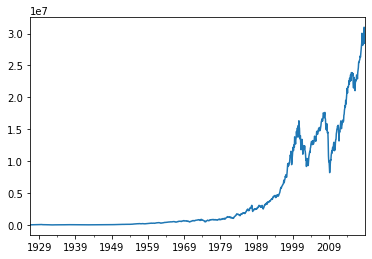

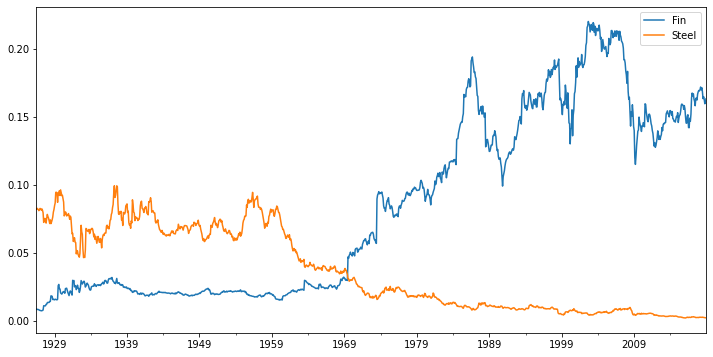

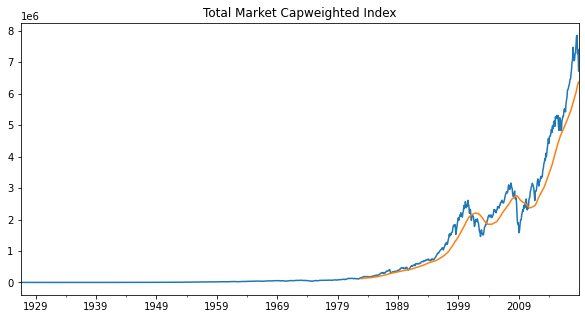

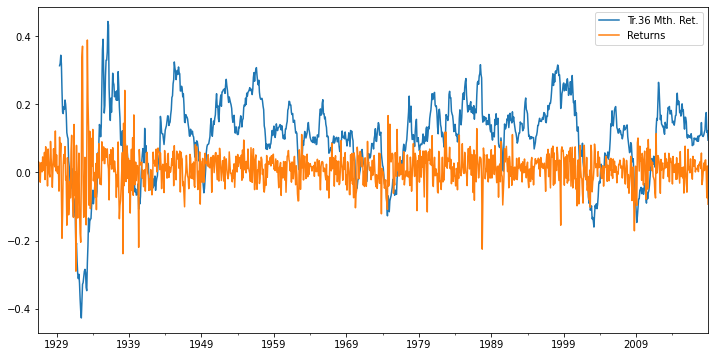

In [13]:
# In this section we are going to build a market index

# Compute market capitalization
ind_mktcap = ind_nfirms * ind_size

# Compute total market capitalization
total_mktcap = ind_mktcap.sum(axis='columns')
total_mktcap.plot()

# Compute the capitalization weight. This calculates the participation of each industry
# in the total market capitalization
ind_capweight = ind_mktcap.divide(total_mktcap, axis='rows')
ind_capweight[['Fin', 'Steel']].plot(figsize=(12, 6))

# Weighted average of returns, whole market
total_market_return = (ind_capweight * ind_return).sum(axis='columns')
plt.figure()
total_market_index = erk.drawdown(total_market_return).wealth

total_market_index.plot(figsize=(10, 5), title='Total Market Capweighted Index')
# Returns of the market over 3-years periods
# End goal: Wealth vs. Market correlation
total_market_index['1980':].rolling(window=36).mean().plot() # moving average of 36 months

# now time aggregate those returns annualized and compare them with the market ones
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets,
                                                                periods_per_year=12)

plt.figure()
tmi_tr36rets.plot(figsize=(12, 6), label='Tr.36 Mth. Ret.', legend=True)
total_market_return.plot(figsize=(12, 6), label='Returns', legend=True)

## Rolling Correlations (using MultiIndexes)

In [15]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

-0.28010065062884015

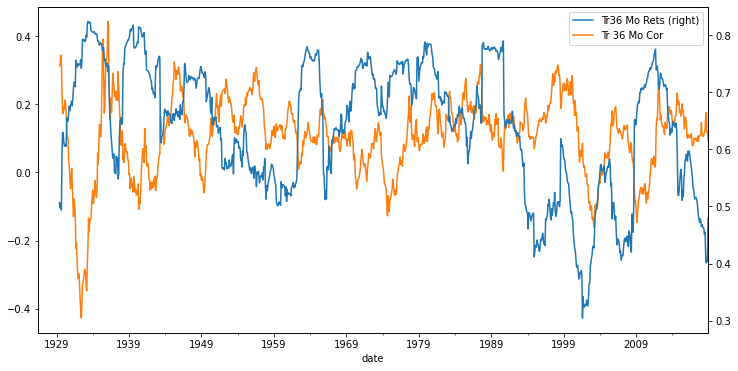

In [33]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())

# When the market is falling, the correlations increase, so diversification
# doesn't help you very much
ind_tr36corr.plot(label='Tr36 Mo Rets', figsize=(12, 6), legend=True, secondary_y=True)
tmi_tr36rets.plot(label='Tr 36 Mo Cor', figsize=(12, 6), legend=True)


# Calculate the correlation between the return and the inter-industry correlation
tmi_tr36rets.corr(ind_tr36corr)

In [ ]:

ts_corr['2018-1':'2018-1'].values